In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Spotify.csv")
print("Features of the datset:")
print(list(df.columns))
print("Shape of the datset:",df.shape)
print("Features Information:",df.info())
print()
print("Datset Description:",df.describe())
#Displaying first 5 rows of the datset
df.head()

Features of the datset:
['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'liked']
Shape of the datset: (195, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [16]:
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

In [3]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
sc=StandardScaler()
x=sc.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=25,train_size=0.8)

In [4]:
model=LogisticRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [5]:
print("Accuracy:",accuracy_score(y_test,ypred)*100)
print("Confusion Matrix:",confusion_matrix(y_test,ypred))
print("Classification Report:",classification_report(y_test,ypred))

Accuracy: 92.3076923076923
Confusion Matrix: [[20  0]
 [ 3 16]]
Classification Report:               precision    recall  f1-score   support

           0       0.87      1.00      0.93        20
           1       1.00      0.84      0.91        19

    accuracy                           0.92        39
   macro avg       0.93      0.92      0.92        39
weighted avg       0.93      0.92      0.92        39



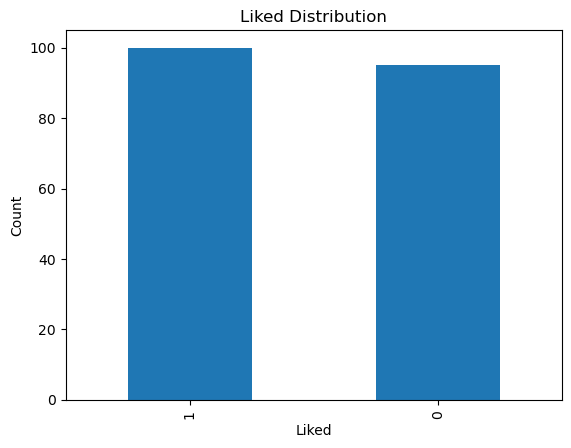

In [8]:
df['liked'].value_counts().plot(kind='bar')
plt.title('Liked Distribution')
plt.xlabel('Liked')
plt.ylabel('Count')
plt.show()

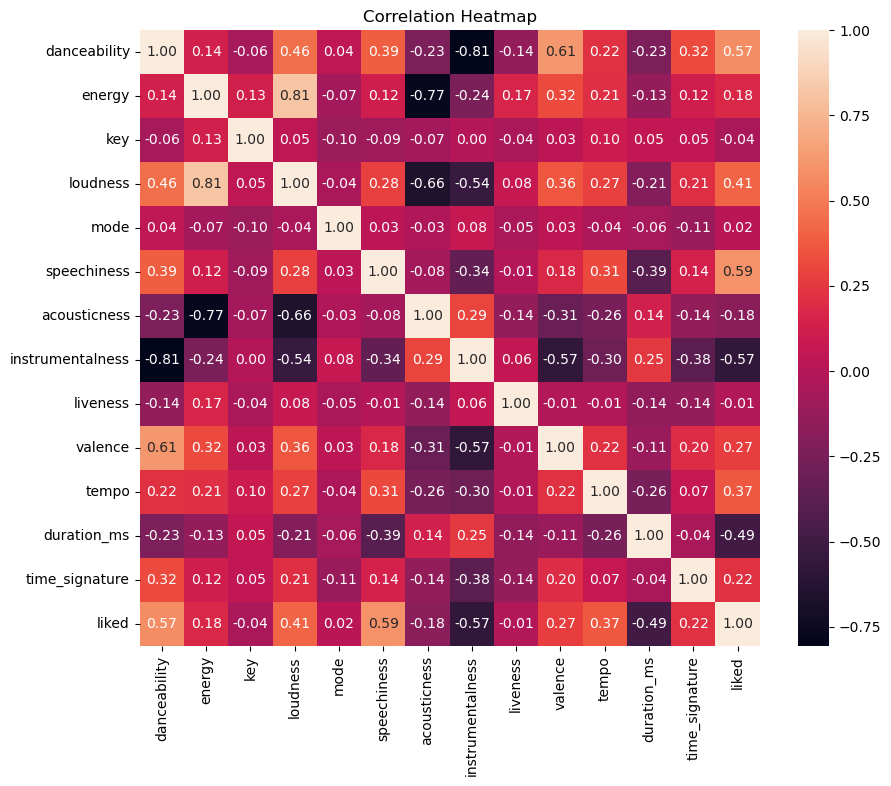

In [9]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

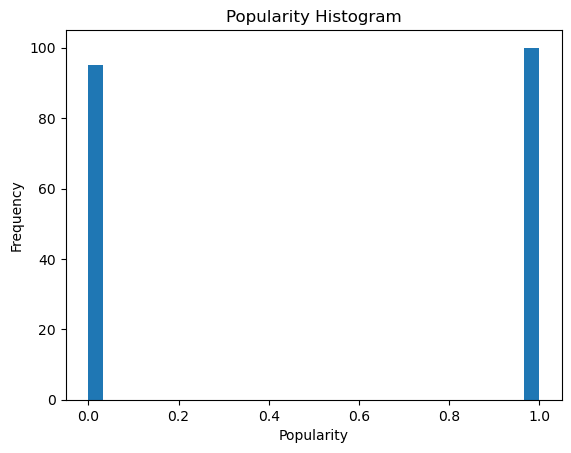

In [10]:
df['liked'].plot(kind='hist', bins=30)
plt.title('Popularity Histogram')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

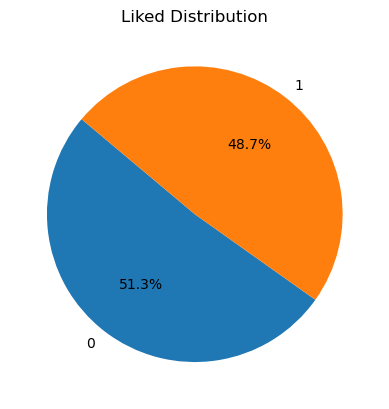

In [11]:
labels = df['liked'].unique()
sizes = df['liked'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Liked Distribution')
plt.show()


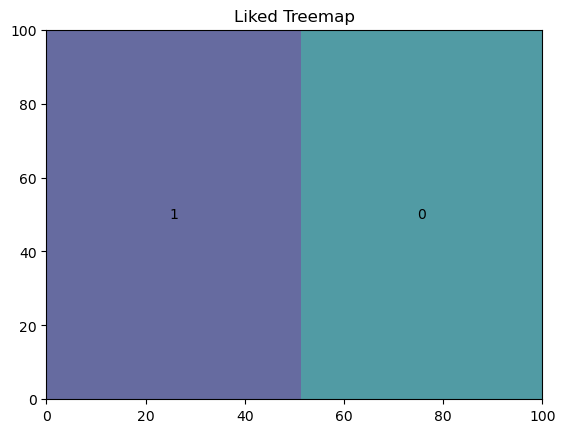

In [12]:
import squarify
sizes = df['liked'].value_counts()
labels = sizes.index
squarify.plot(sizes=sizes, label=labels, alpha=.8)
plt.title('Liked Treemap')
plt.show()

In [13]:
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']